In [102]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Markdown as md
import plotly.io as pio

In [103]:
#Load covid 19 datset
df= pd.read_csv("owid-covid-data.csv")

In [104]:
df.shape

(152463, 67)

EDA

In [105]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [106]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152463 entries, 0 to 152462
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    152463 non-null  object 
 1   continent                                   143274 non-null  object 
 2   location                                    152463 non-null  object 
 3   date                                        152463 non-null  object 
 4   total_cases                                 149838 non-null  float64
 5   new_cases                                   149801 non-null  float64
 6   new_cases_smoothed                          148650 non-null  float64
 7   total_deaths                                132634 non-null  float64
 8   new_deaths                                  132822 non-null  float64
 9   new_deaths_smoothed                         132690 non-null  float64
 

Lot of data with NaN. And all data is not relevant for this EDA. For example, of the 152463 rows of data, columns like excess_mortality, excess_mortality_cumulative has data in only 5234 row (~3.4%). This is very little useable data in the context of all other available data.

We will create a subset of the df later. For now, lets delete the columns with data in <33% of the rows.

In [108]:
df_temp = df[[column for column in df if df[column].count() / len(df) >= .33]]
print("List of columns which has less data and can be dropped: \n", end="")
for c in df.columns:
    if c not in df_temp.columns:
        print(c, end=", ")

List of columns which has less data and can be dropped: 
icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, 

Columns which have all data.

In [109]:
df_temp = df[[column for column in df if df[column].count() / len(df) == 1.0]]
print("List of columns which have all data: \n", end="")
for c in df.columns:
    if c in df_temp.columns:
        print(c, end=", ")

List of columns which have all data: 
iso_code, location, date, 

In [110]:
#Splitting date into month and year, and creating a new cloumns for month and date
df["day"]=pd.to_datetime(df.date).dt.day
df["month"]=pd.to_datetime(df.date).dt.month
df["year"]=pd.to_datetime(df.date).dt.year

#Create dictionary for month, and replace it in the dataframe.
month={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"Septemper",10:"October",
       11:"November",12:"December"}

df["month"]=df["month"].map(month)

df.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day,month,year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,24,February,2020
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,25,February,2020
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,26,February,2020
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,27,February,2020
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,28,February,2020
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,29,February,2020
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1,March,2020
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2,March,2020
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,3,March,2020
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,4,March,2020


In [111]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Some simple tests on the data

In [112]:
#New cases in United Kingdom in February 2020
df.loc[df.year == 2020].loc[df.location == 'United Kingdom'].loc[df.month =='February'].new_cases.sum()
#Confirmed this via Google

59.0

In [113]:
#Total covid deaths in the world in 2021 by each month

df.loc[df.year == 2021].loc[df.location == 'World'].groupby(["month"]).new_deaths.sum()

#Alternatively, below code EXCLUDING WORLD should give the same result, but it doesnt,
#   as location column includes not just countries, but a few other entries. This is shown below.
#df.loc[df.year == 2021].loc[df.location != 'World'].groupby(["month"]).new_deaths.sum()

month
April        378788.0
August       299853.0
December     218968.0
February     311215.0
January      417387.0
July         260692.0
June         271665.0
March        300341.0
May          379368.0
November     215601.0
October      216476.0
Septemper    264636.0
Name: new_deaths, dtype: float64

In [114]:
df[df['continent'].isna()].location.unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Low income', 'Lower middle income',
       'North America', 'Oceania', 'South America', 'Upper middle income',
       'World'], dtype=object)

In [115]:
index_rows = df[ df["location"].isin( df[df['continent'].isna()].location.unique() ) ].index

df.drop(index_rows, inplace=True)

In [117]:
#Another way to see this data
df.loc[df.year == 2021].loc[df.location != 'World'].groupby(["month"]).new_deaths.sum()

month
April        378788.0
August       299853.0
December     218968.0
February     311215.0
January      417387.0
July         260692.0
June         271665.0
March        300341.0
May          379368.0
November     215601.0
October      216476.0
Septemper    264636.0
Name: new_deaths, dtype: float64

Extract relevant columns to a subset for further data observations.

In [118]:
df_subset=df[['year','month','iso_code', 'continent','location','total_cases','new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated','people_fully_vaccinated','population']]
df_subset.head(50)

,year,month,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population
0,2020,February,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,39835428.0
1,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
2,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
3,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
4,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
5,2020,February,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
6,2020,March,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
7,2020,March,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
8,2020,March,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0
9,2020,March,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0


In [71]:


df_subset['location'].unique()
#df_subset[['location', 'new_cases']].groupby(["location"]).head()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [72]:
df_subset.isnull().sum()

year                            0
month                           0
iso_code                        0
continent                    9189
location                        0
total_cases                  2625
new_cases                    2662
total_deaths                19829
new_deaths                  19641
people_vaccinated          114952
people_fully_vaccinated    117831
population                   1016
dtype: int64

In [74]:
#New cases in UK in August 2020
df_subset.loc[df_subset.year == 2020].loc[df_subset.location == 'United Kingdom'].loc[df_subset.month =='August'].new_cases.sum()
#df_subset['year'==2020].head()

32730.0

In [75]:
df_group=df_subset.groupby(["year","month","continent","location","iso_code"]).sum()
df_group.shape
df_group.head()

total_cases  new_cases  \
year month continent location     iso_code                           
2020 April Africa    Algeria      DZA           69497.0     3290.0   
                     Angola       AGO             601.0       20.0   
                     Benin        BEN            1178.0       55.0   
                     Botswana     BWA             437.0       19.0   
                     Burkina Faso BFA           15230.0      384.0   

                                            total_deaths  new_deaths  \
year month continent location     iso_code                             
2020 April Africa    Algeria      DZA             9197.0       406.0   
                     Angola       AGO               60.0         0.0   
                     Benin        BEN               25.0         1.0   
                     Botswana     BWA               30.0         0.0   
                     Burkina Faso BFA              921.0        29.0   

                                            people_vaccinated  \
year month continent location     iso_code                      
2020 April Africa    Algeria      DZA                     0.0   
                     Angola       AGO                     0.0   
                     Benin        BEN                     0.0   
                     Botswana     BWA                     0.0   
                     Burkina Faso BFA                     0.0   

                                            people_fully_vaccinated  \
year month continent location     iso_code                            
2020 April Africa    Algeria      DZA                           0.0   
                     Angola       AGO                           0.0   
                     Benin        BEN                           0.0   
                     Botswana     BWA                           0.0   
                     Burkina Faso BFA                           0.0   

                                              population  
year month continent location     iso_code                
2020 April Africa    Algeria      DZA       1.338499e+09  
                     Angola       AGO       1.018008e+09  
                     Benin        BEN       3.735309e+08  
                     Botswana     BWA       7.191720e+07  
                     Burkina Faso BFA       6.449129e+08

count    1.498010e+05
mean     8.336280e+03
std      4.893941e+04
min     -7.434700e+04
25%      1.000000e+00
50%      6.900000e+01
75%      9.170000e+02
max      2.540890e+06
Name: new_cases, dtype: float64


C:\Users\vn.US\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



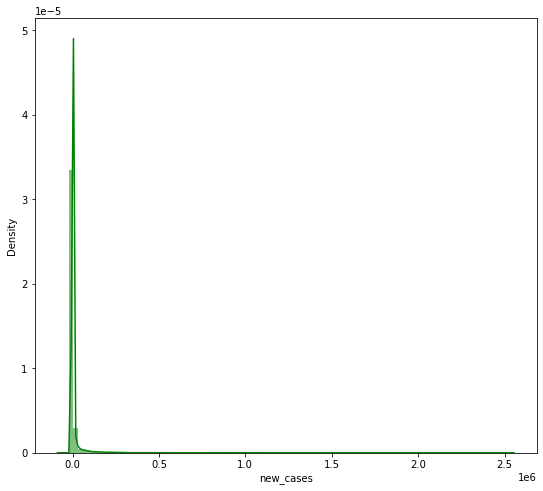

In [79]:
print(df['new_cases'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['new_cases'], color='g', bins=100, hist_kws={'alpha': 0.5});

#total confirmed cases in 2020
#df_group['year'==2020].total_cases.sum()